# VARIANZA DELLA LOSS FUNCTION NEI PQC

$\textbf{Introduzione}$

I Variational Quantum Algorithms (VQA) sono un approccio computazionale estremamente efficiente per risolvere molte tipologie di problemi. Tuttavia, al crescere della dimensione del circuito si incontra una concentrazione esponenziale della funzione di loss attorno alle soluzioni, fenomeno noto come Barren Plateu (BP).

E' stata studiata la presenza di BP in circuiti con rumore unitario tramite formalismo di Lie, tuttavia, i risultati ottenuti non sono generalizzabili al caso in cui rumore sia generico. L'articolo da cui siamo partiti si propone di utilizzare il formalismo delle matrici non negative per descrivere l'andamento della varianza nel caso di un rumore entangling generico.

Il lavoro di questo Notebook vuole esporre dei risultati numerici ottenuti sulla falsa riga dello studio seguente.

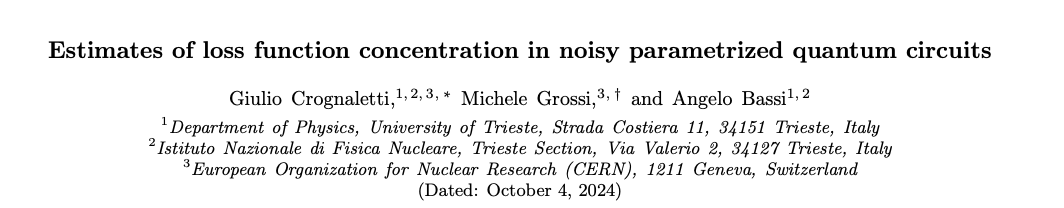

In [ ]:
from IPython.display import Image, display

imagine = "/Users/sebastianopian/Documents/Uni/Magistrale/Qc/QC.exam-1/Img/Screenshot 2025-02-22 alle 12.50.24.png"

display(Image(filename=imagine, width=600, height=400))

$\textbf{Circuiti quantistici parametrizzati (PQC) }$

I circuiti quantistici parametrizzati (PQC) sono utilizzati in algoritmi ibridi quantistici-classici per risolvere problemi computazionali e sono la base per Algoritmi Quantistici Variazionali (VQA).

Le componenti principali dei VQA includono porte quantistiche parametrizzate ed un ottimizzatore classico che regola i parametri per minimizzare o massimizzare una funzione obiettivo, generalmente il valore di aspettazione di unn osservabile.

Gli algoritmi VQA funzionano in modo iterativo, alternando elaborazione quantistica e classica, e la scelta dell'ansatz influisce sull'ottimizzazione.

Le funzioni di costo traducono i parametri quantistici in valori reali, mentre l'ottimizzatore cerca i minimi su una ipersuperficie definita da:

$$C(θ)=∑_kf_k(Tr(O_kρ_k(θ)))$$

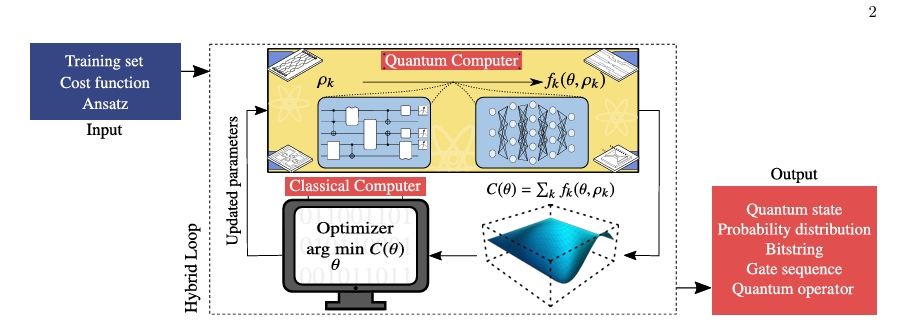

In [ ]:
from IPython.display import Image, display

image5 = "Img/Screenshot_23-1-2025_104642_.jpeg"

display(Image(filename=image5, width=600, height=400))

$\textbf{Barren Plateau}$

Il fenomeno del *Barren Plateau* è un fenomeno tipico dei circuiti quantistici parametrizzati (PQC), dove il gradiente della funzione di costo tende ad annullarsi esponenzialmente all'aumentare del numero di qubit; divenendo piatto il tutto lo spazio dei parametri. Questo effetto rende difficile l'addestramento degli algoritmi quantistici variazionali, poiché la probabilità che il gradiente lungo una direzione significativa sia diverso da zero diminuisce rapidamente con l'aumentare dei qubit, rendendo molto complessa la scelta della direzione per le iterazioni successive.

Questo fenomeno emerge sia dalla dimensionalità del sistema che dall'entanglement del circuito iniziale e dell'osservabile.

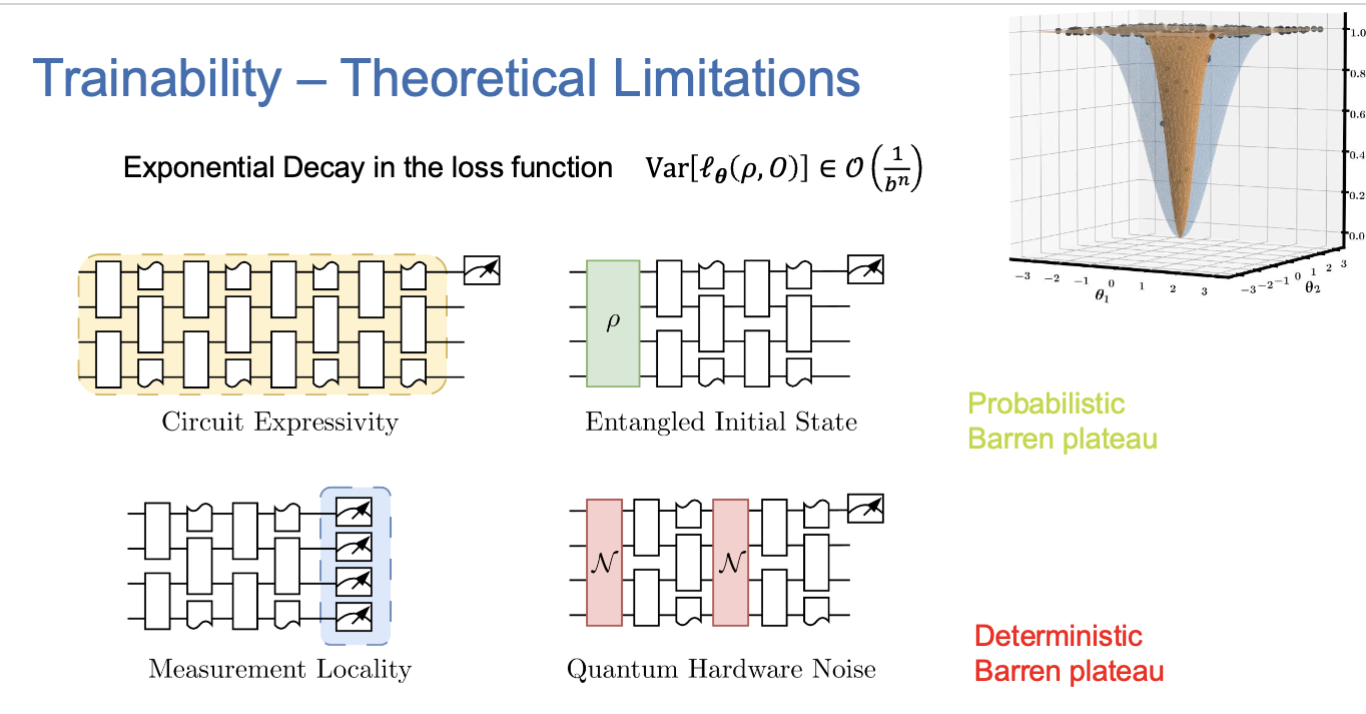

In [ ]:
image1 = "Img/Screenshot 2025-01-23 alle 11.32.53.png"
display(Image(filename=image1, width=500, height=400))

$\textbf{Vettori di Località}$

Dato uno spazio di Hilbert di più qbit ($ \textit{H} = \otimes_{m} H_m $, con $ \text{dim}(\mathcal{H}) = \prod_{m} \text{dim}(\mathcal{H}_m) $), Chiamiamo $\Phi_{\vec{\theta}} $ il canale quantistico (circuito) che agisce sui qbit e dipende da un vettore di parametri $\vec{\theta}$.

La funzione di costo che si vuole in genere minimizzare è: $ \mathcal{L}_{\rho, k} = \text{Tr}[\Phi(\rho)H] $, con $ H $ osservabile da determinare. Il BP può essere visto dalla varianza di $ \mathcal{L}: \textbf{V}_{\rho,H}(\theta) $. Nello specifico, c'è un BP se $ \textbf{V} \propto O(e^{-\beta n}) $ con $ n $ numero di QBIT.

In generale, lo spazio $ H $ può essere suddiviso in sottosistemi locali. Questa suddivisione di $ H $ induce una corrispondente partizione dello spazio $ B $ degli operatori limitati su $ H $. Gli operatori in $ B $ vengono raggruppati in sottospazi $ B_\kappa $, generati dagli operatori a traccia nulla che agiscono non trivialmente su $H_m$. Ogni sottospazione è identificato da un vettore binario $ \kappa $ (con $ \kappa \in \{0, 1\}^M $), che indica su quali sottosistemi locali gli operatori agiscono trivialmente e su quali non (per ogni sottospazio non triviale $ \kappa_m = 1 $).

Lo spazio $ B $ è scomposto come somma diretta:
$$
B = \bigoplus_{\kappa \in \{0,1\}^M} B_\kappa.
$$
La dimensione di ciascun sottospazio $ B_\kappa $ è data da:
$ d_\kappa = \prod_m (d_m^2 - 1)^{\kappa_m} $, dove $ d_m $ rappresenta la dimensione del sottosistema $ H_m $. Il caso speciale $ \kappa = 0 $ corrisponde a operatori triviali.

Possiamo in sostanza dividere lo spazio di Hilbert in base a come gli operatori agiscono su di esso. Se, per esempio, un operatore $ A $ agisce trivialmente sul primo Qbit e non trivialmente sul secondo, lo indicheremo con la stringa: "10".
Come vedremo più avanti, gli operatori faranno nascere dei sottospazi isolati nello spazio di Hilbert, ovvero, stati che restano nello stesso sottospazio anche dopo l'applicazione lineare.

Allo stesso tempo, è possibile osservare sottospazi che si disperdono, ovvero dove le applicazioni "generano" dei sottospazi non isolati, mappati in sottospazi isolati: i sottospazi isolati assorbono informazione dai sottospazi dispersivi.
Questa osservazione relativa alla dispersione e all'assorbimento di stati è alla base di questo lavoro, in quanto l'assorbimento da una parte all'altra del circuito è una causa importante dell'aumento della varianza.

Un operatore $ A \in B $ si dice $ \kappa $-locale se appartiene a $ B_\kappa $. A ciascun operatore si associa un vettore di località $ \ell_A \in \mathbb{R}^{2^M} $, che descrive quanto l'operatore è distribuito nei vari sottospazi $ B_\kappa $. Il vettore di località $ \ell_A $ è definito come un vettore di dimensione pari al numero di sottospazi in cui lo spazio $ B $ è suddiviso. Ogni componente $ (\ell_A)_\kappa $ rappresenta la proiezione dell'operatore $ A $ sul sottospazio $ B_\kappa $.

Questa formula misura la somma dei quadrati delle proiezioni dell'operatore $ A $ sugli elementi della base $ \{B_j\}_j $, normalizzata rispetto alla dimensione del sottospazio. Questo vettore è calcolato utilizzando una base ortonormale hermitiana $ \{B_j\}_j $ di $ B_\kappa $, e gli elementi di $ \ell_A $ sono definiti come:
$$
(\ell_A)_\kappa = \frac{\sum_{j=1}^{d_\kappa} \text{Tr}[B_j A]^2}{d_\kappa}.
$$

Se $ A $ è un operatore locale, il vettore di località assume la forma più semplice:  $ (\ell_A)_\lambda = \delta_{\kappa,\lambda} \|A\|_2 $.

$\textbf{Varianza Analitica}$

$ L $ è il numero dei layers. $ E_{\theta}\{.\} $ rappresenta il valore di aspettazione rispetto al parametro $ \theta $.

Vale:$$ E_{\theta}(\text{Tr}[\Phi_{\theta}(\rho)H]^2) = (l_{\rho}, \prod_{l=1}^{L}T_l l_H) $$, dove $T_l$ è la LTM associata al canale $\mathcal{E_l}$(matrice non-negativa). Inoltre:

$$
\textbf{V}_{\rho,H}^L = (l_{\rho}, \prod_{l=1}^{L}T_l l_H) - \frac{\text{Tr}[H]^2}{d^2}.
$$

Questa formula è inutilizzabile per grandi profondità a causa della sua complessità computazionale; ciò nondimeno sarà usata per ricavare il limite a profondità grandi.

Per circuiti profondi, il contributo degli autovalori $T_l$ diventa dominante.
Considereremo circuiti dove $\mathcal{E_l = E}$ e dove tutti gli osservabili H hanno traccia nulla, in modo che il secondo termine della varianza sia uguale a zero e che scompaia la sommatoria in favore di L.


$$\textbf{V}_{\rho,H}^L = (l_{\rho},\prod^L T_l l_H)$$

Dove $T_l$ è la matrice TLM del gate $\mathcal{E}_l$

Se $L \rightarrow \infty $,

$$V_\infty^{\rho,H} = \sum_z (\ell \rho_z, w_z)(\ell_H)_z + (\ell \rho_z, w_z)(A \ell_H)_z$$
Dove $w_z$ è autovalore destro di $T_z$, A è la $\textbf{matrice di assorbimento}$ della stessa dimensione di T (vedi fig. sotto).

Questa forma mette in evidenza come certi sottospazi si comportino da attrattori per la varianza.

In generale, non è detto che la varianza converga ad un valore ma, almeno rimane limitata. Nel lavoro, la convergenza della varianza sarà studiata dalla limitazione:

$$
\left| V^l_{\rho, H} - V^\infty_{\rho, H} \right| \in O\left(e^{-\beta L }\|H\|_2^2\right)
$$

$\textbf{Noise non unitario}$

Adesso prendiamo in considerazione circuiti quantistici affetti da noise non unitale, come per esempio un rumore depolarizzante.
Consideriamo $\mathcal{E}_c(\rho) = (1-p)\mathcal{E}(\rho) + p\tilde{\rho}$ dove  $\tilde{\rho}$ è uno stato arbitrario entangled e p la probabilità di errore.

Possiamo pensare a $\Phi(\rho)= (1-p)\rho + p\tilde{\rho}$. Allora:


$$V_{\infty}^{\rho,H} =   p^2(l_{\tilde{\rho}}(I-(1-p)^2T)l_H)$$

e se T è un proiettore,

$$V_{\infty}^{\rho,H} = (p/(2-p) - p^2)(l_{\tilde{\rho}}, Tl_H) + p^2(l_{\tilde{\rho}}, l_H)$$

Notiamo che è scomparsa la dipendenza dallo stato iniziale e solo i layer dopo un certo L contribuiscono sensibilmente alla varianza.

In particolare, possiamo considerare due limiti contrapposti. Nel primo il noise "entangla" lentamente lo stato ($T\simeq I$), a quel punto il primo termine è dominante. D'altra parte, se il noise entangla velocemente lo stato, il secondo termine è dominante.

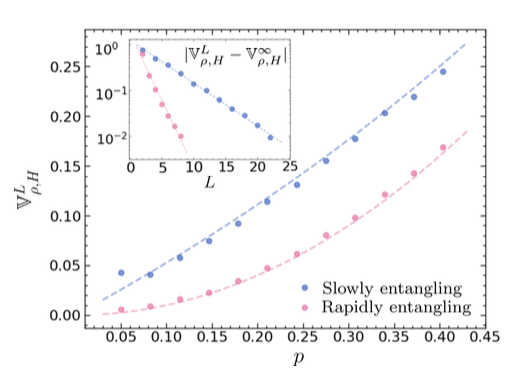

In [ ]:
from IPython.display import Image, display

# Percorso dell'immagine
image4 = 'Img/Screenshot 2025-01-22 alle 16.47.42.png'
display(Image(filename=image4, width=500, height=400))

Il grafico sopra è tratto dal paper da cui siamo partiti. Mostra la differenza tra gli andamenti della varianza calcolati analiticamente e numericamente per un circuito con "slow entangling" e "rapid entangling". Il nostro obiettivo sarà di riprodurre risultati simili.

$\textbf{Circuito scelto}$

Per simulare il rumore entangling, sono stati il sistema è stato mandato, ad ogni layer, con probabilità p lo stato nel GHZ (stato di massimo entanglement):
$$\tilde{\rho} = \frac{(\vert 0 \rangle^{\otimes n} + \vert 1 \rangle^{\otimes n})(\langle 0 \vert^{\otimes n} + \langle 1 \vert^{\otimes n})}{2^n}$$
.
Il canale considerato è quindi della forma $\mathcal{E}_c = N \circ \mathcal{E}$, dove:
$$\mathcal{E}_c(\rho) = (1-p)\mathcal{E}(\rho) + p\tilde{\rho},$$

Lo stato iniziale è fissato come $\rho = (\vert 0 \rangle \langle 0 \vert)^{\otimes n}$ a cui vengono applicate una serie di rotazioni su X e Z casuali.
Successivamente  sono applicati due CNOT e due SWAP, come nella figura sotto. Infine è applicata la mappa di rumore. Il tutto viene ripetuto per L layers al termine dei quali si misura lo stato e l'osservabile.

L'osservabile scelto è stato:
$$
H = h \sum_{k=1}^n 2^{n/2} Z_k \otimes Z_{k+1},
$$

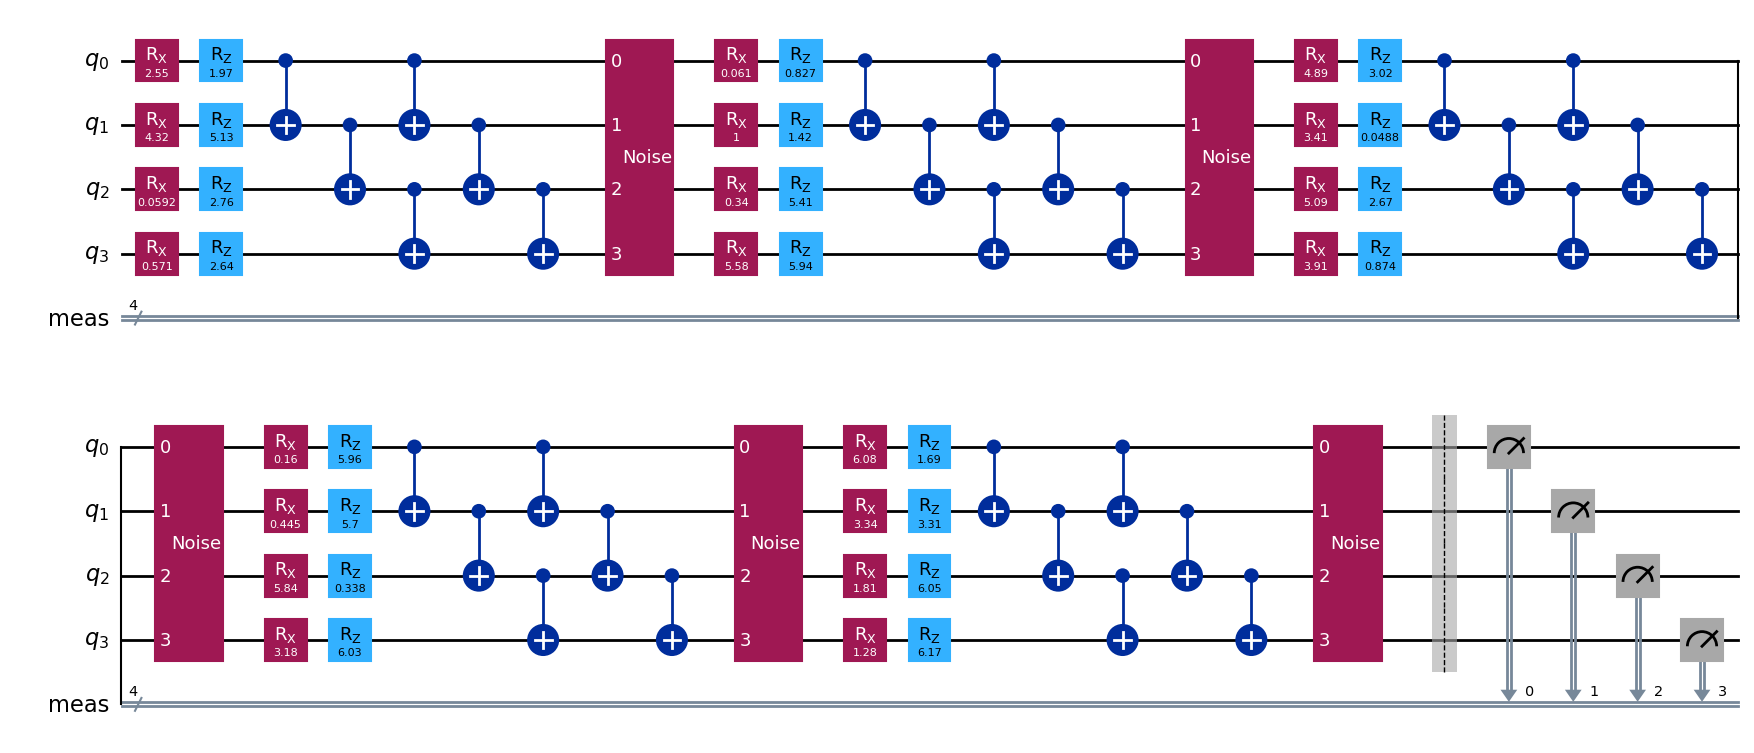

In [ ]:
import qiskit as qc
from qiskit_aer import Aer
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import DensityMatrix, SparsePauliOp
import matplotlib.pyplot as plt
import itertools
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.sparse.csgraph import connected_components
from functools import reduce
from qiskit.circuit import Gate

def generate_random_parameters(n):
    return 2 * np.pi * np.random.rand(2 * n)

n = 4  # Numero di qubit
L_final=5
noise_gate = Gate(name="Noise", num_qubits=n, params=[])
circuit = QuantumCircuit(n)
rho = DensityMatrix.from_instruction(circuit).data  # Matrice densità iniziale

for _ in range(L_final):
        # Applica rotazioni casuali
    parameters = generate_random_parameters(n)

    for i in range(n):
        circuit.rx(parameters[2 * i], i)
        circuit.rz(parameters[2 * i + 1], i)
    circuit.cx(0,1)
    for i in range (n-2):
        circuit.cx(i+1, i+2)
        circuit.cx(i, i+1)
    circuit.cx(n-2,n-1)

    circuit.append(noise_gate, range(n))

circuit.measure_all()

circuit.draw('mpl')

Per quanto riguarda lo "slow entangle", al posto della sequenza di Cnot e SWAP, è stata applicata una catena di rotazioni controllate "piccole" lungo X.

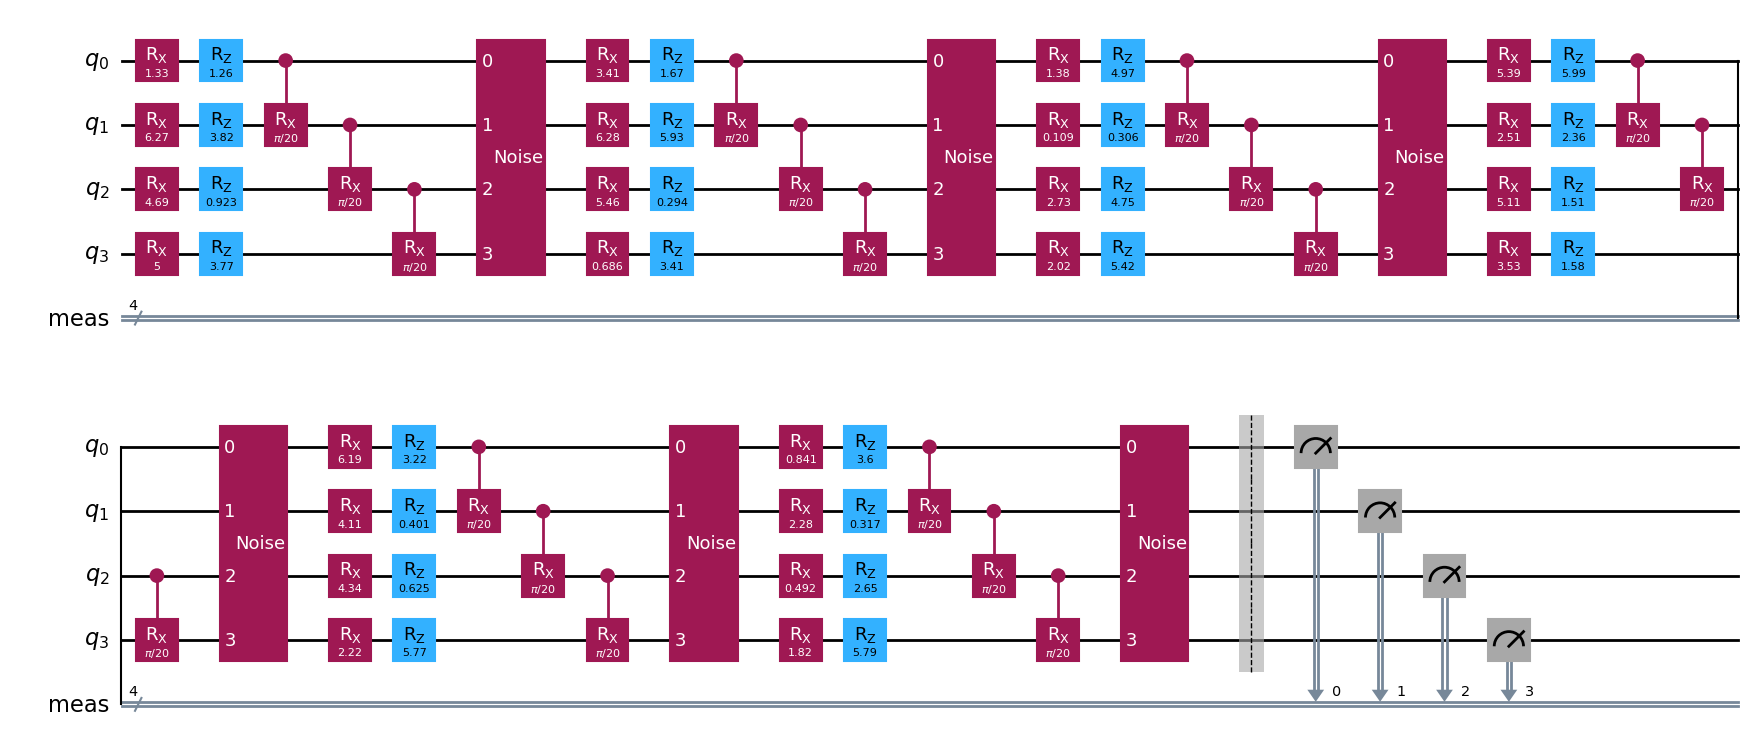

In [ ]:
from qiskit.circuit import Gate
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import DensityMatrix

L_final = 6
noise_gate = Gate(name="Noise", num_qubits=n, params=[])

circuit = QuantumCircuit(n)
rho = DensityMatrix.from_instruction(circuit).data  # Matrice densità iniziale

for _ in range(L_final):
    # Applica rotazioni casuali
    parameters = 2 * np.pi * np.random.rand(2 * n)
    for i in range(n):
        circuit.rx(parameters[2 * i], i)
        circuit.rz(parameters[2 * i + 1], i)

    # Controllo rotazione RX(π/10)
    circuit.crx(np.pi / 20, 0, 1)
    circuit.crx(np.pi / 20, 1, 2)
    circuit.crx(np.pi / 20, 2, 3)

    # Aggiunta del rumore
    circuit.append(noise_gate, range(n))

circuit.measure_all()

# Disegna il circuito
circuit.draw('mpl')

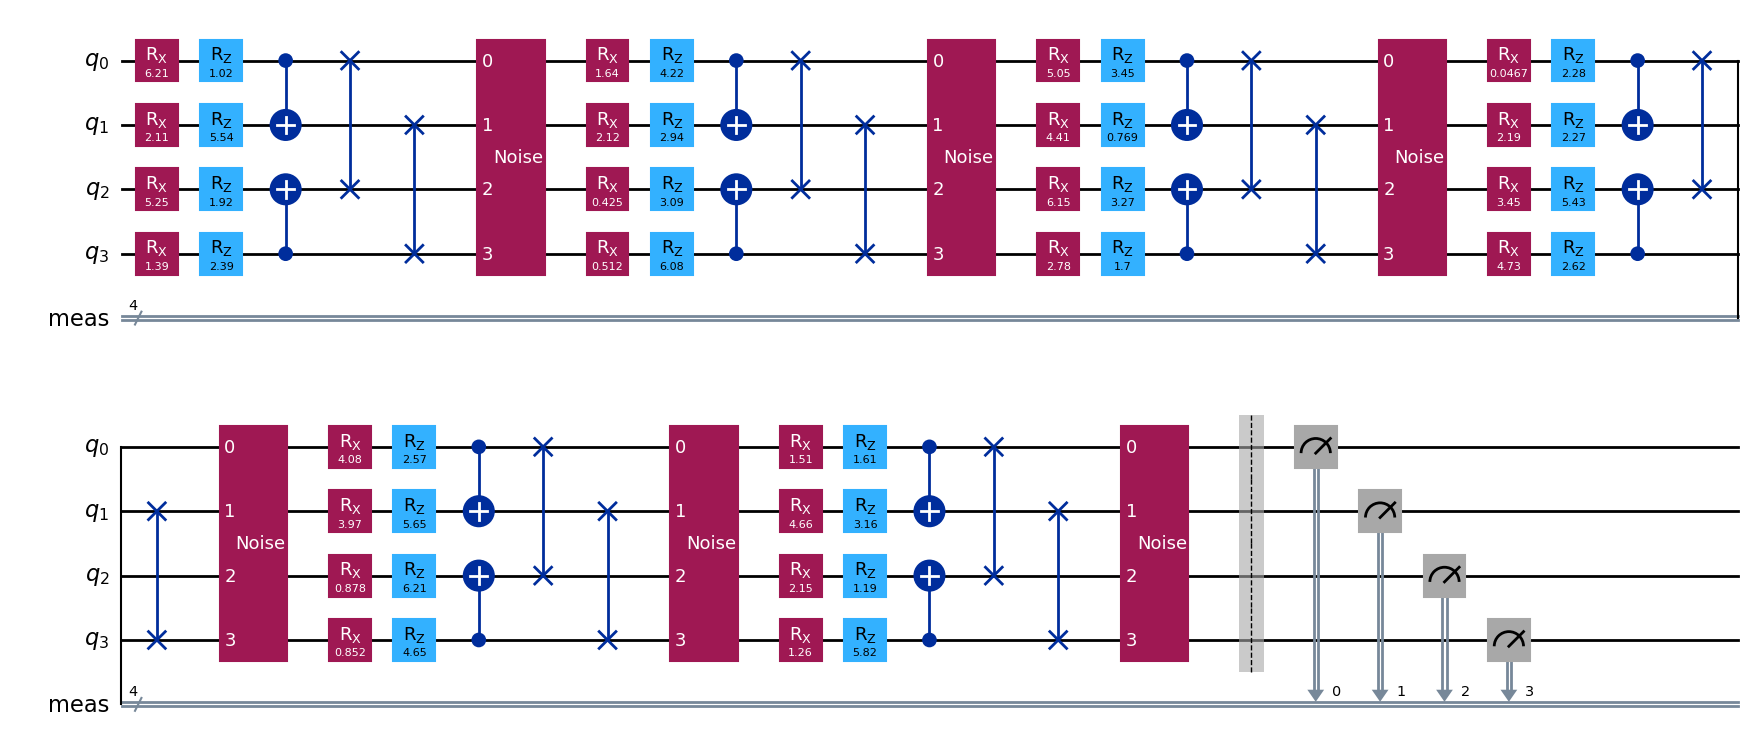

In [ ]:
def generate_random_parameters(n):
    return 2 * np.pi * np.random.rand(2 * n)

n = 4  # Numero di qubit
L_final=6
noise_gate = Gate(name="Noise", num_qubits=n, params=[])
circuit = QuantumCircuit(n)
rho = DensityMatrix.from_instruction(circuit).data  # Matrice densità iniziale

for _ in range(L_final):
        # Applica rotazioni casuali
    parameters = generate_random_parameters(n)

    for i in range(n):
        circuit.rx(parameters[2 * i], i)
        circuit.rz(parameters[2 * i + 1], i)
    circuit.cx(0,1)
    circuit.cx(3,2)
    circuit.swap(0,2)
    circuit.swap(3,1)


    circuit.append(noise_gate, range(n))

circuit.measure_all()
circuit.draw('mpl')

$\textbf{Risultati per la varianza}$

Di seguito è riportato l'andamento della varianza nel caso fast (blu) e slow (verde) in funzione del numero di layers L (a p=0.1) e della probabilità p (a L=20).
Notiamo che, nel primo plot, le curve tendono a convergere molto rapidamente al valore analitico di $V_{\infty}^{\rho,H}$.

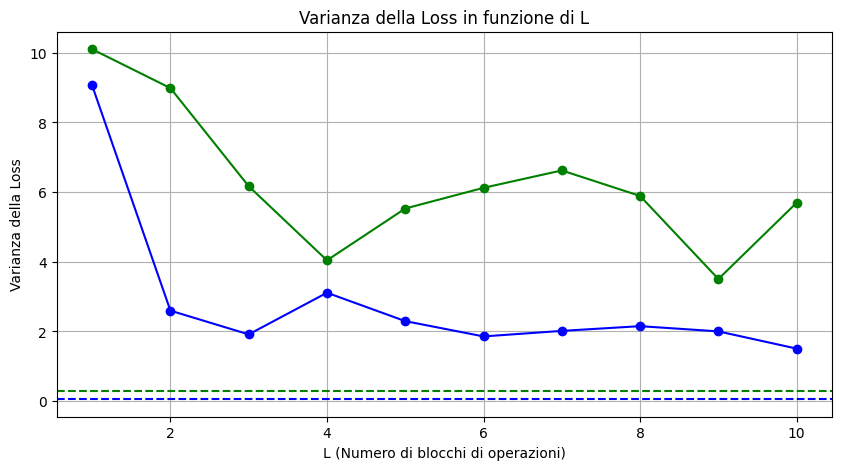

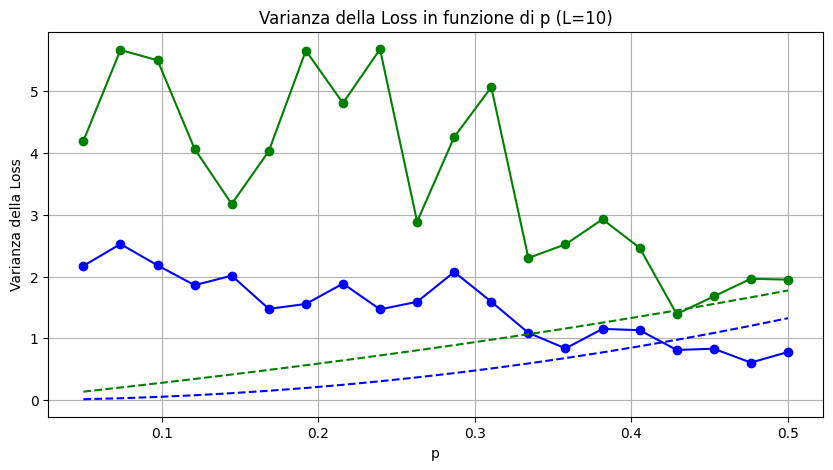

In [ ]:
# Parametri
n=4
shots = 50  # Numero di esecuzioni
L_values_range = 10  # Numero massimo di blocchi di operazioni
p = 0.1  # Probabilità di applicare lo stato GHZ
h = 1  # Coefficiente nell'Hamiltoniano

# Funzione per generare parametri casuali
def generate_random_parameters(n):
    return 2 * np.pi * np.random.rand(2 * n)

# Funzione per mescolare rho con lo stato GHZ
def rho_noise(p, rho):
    rho_ghz = np.zeros_like(rho)
    rho_ghz[0, 0] = 0.5
    rho_ghz[-1, -1] = 0.5
    rho_ghz[0, -1] = 0.5
    rho_ghz[-1, 0] = 0.5
    return (1-p)* rho + (p) * rho_ghz

# Funzione per costruire il circuito e applicare il rumore
def circuit_with_noise(n, p, L):

    circuit = QuantumCircuit(n)
    rho = DensityMatrix.from_instruction(circuit).data  # Matrice densità iniziale

    for _ in range(L):
        # Applica rotazioni casuali
        parameters = generate_random_parameters(n)

        circuit.cx(0,1)

        for i in range(n):
           circuit.rx(parameters[2 * i], i)
           circuit.rz(parameters[2 * i + 1], i)
        circuit.cx(0,1)
        for i in range (n-2):
           circuit.cx(i+1, i+2)
           circuit.cx(i, i+1)
        circuit.cx(n-2,n-1)

        # Evoluzione dello stato
        rho = DensityMatrix.from_instruction(circuit)
        rho = rho_noise(p, rho)
    return rho

def circuit_with_noise_slow(n, p, L):

    circuit = QuantumCircuit(n)
    rho1 = DensityMatrix.from_instruction(circuit).data

    for _ in range(L):
        # Applica rotazioni casuali
        parameters = generate_random_parameters(n)
        for i in range(n-1):
            circuit.rx(parameters[2 * i], i)
            circuit.rz(parameters[2 * i + 1], i)
        # Applica i CNOT e gli swap
        circuit.crx(np.pi / 20, 0, 1)
        circuit.crx(np.pi / 20, 1, 2)
        circuit.crx(np.pi / 20, 2, 3)

        # Evoluzione dello stato
        rho1 = DensityMatrix.from_instruction(circuit)
        rho1 = rho_noise(p, rho1)
    return rho1

# Creazione dell'Hamiltoniano W
pauli_strings = []
coefficients = []

for k in range(n-1):
     # Coefficiente del termine
    coefficients.append(h *(2**(n/2)))
    # Stringa di Pauli per Z_k ⊗ Z_{k+1}
    pauli_string = ['I'] * n
    pauli_string[k] = 'Z'  # Z_k
    pauli_string[(k + 1)] = 'Z'  # Z_{k+1} (periodico)
    pauli_strings.append("".join(pauli_string))

# Creazione dell'Hamiltoniano come SparsePauliOp
W = SparsePauliOp(pauli_strings, coeffs=np.array(coefficients))

# Lista per memorizzare i valori di L
L_values_all = {L: [] for L in range(1, L_values_range + 1)}
L_values_all1 = {L: [] for L in range(1, L_values_range + 1)}

for L in range(1, L_values_range + 1):
    L_values_shots = []
    L_values_shots1 = []

    for _ in range(shots):
        rho = circuit_with_noise(n, p, L)  # Stato con rumore
        W_matrix = W.to_matrix()
        L_value = np.trace(W_matrix @ rho.data)  # Loss
        L_values_shots.append(L_value)

        rho1 = circuit_with_noise_slow(n, p, L)  # Stato con rumore
        W_matrix = W.to_matrix()
        L_value1 = np.trace(W_matrix @ rho1.data)  # Loss
        L_values_shots1.append(L_value1)

    L_values_all[L] = L_values_shots
    L_values_all1[L] = L_values_shots1

L_means = {L: np.mean(L_values_all[L]) for L in range(1, L_values_range + 1)}
L_variances = {L: np.var(L_values_all[L]) for L in range(1, L_values_range + 1)}
L_means1 = {L: np.mean(L_values_all1[L]) for L in range(1, L_values_range + 1)}
L_variances1 = {L: np.var(L_values_all1[L]) for L in range(1, L_values_range + 1)}

# Plot della varianza in funzione di L
L_range = list(L_variances.keys())
var_values = list(L_variances.values())
L_values = list(L_means.values())
var_values1 = list(L_variances1.values())
L_values1 = list(L_means1.values())
var_values1 = np.array(var_values1, dtype=float)

plt.figure(figsize=(10, 5))
plt.plot(L_range, var_values, marker='o', linestyle='-', color='b')
plt.plot(L_range, var_values1, marker='o', linestyle='-', color='g')
plt.xlabel('L (Numero di blocchi di operazioni)')
plt.ylabel('Varianza della Loss')
plt.title('Varianza della Loss in funzione di L')
plt.axhline(y=5.33*(p**2), color='b', linestyle='--', label="V_inf")
plt.axhline(y=0.04*(p**2) + (p/(2-p))*5.29, color='g', linestyle='--', label="V_inf")
plt.grid(True)
plt.show()

p_values = np.linspace(0.05, 0.5, 20)

for p in p_values:
    L_values_shots = []
    L_values_shots1 = []
    for _ in range(shots):
        rho = circuit_with_noise(n, p, L_values_range)
        rho1=circuit_with_noise_slow(n,p, L_values_range)  # Stato con rumore
        W_matrix = W.to_matrix()
        L_value = np.trace(W_matrix @ rho.data)
        L_value1 = np.trace(W_matrix @ rho1.data)  # Loss
        L_values_shots.append(L_value)
        L_values_shots1.append(L_value1)
    L_values_all[p] = L_values_shots
    L_values_all1[p] = L_values_shots1

L_means = {p: np.mean(L_values_all[p]) for p in p_values}
L_variances = {p: np.var(L_values_all[p]) for p in p_values}
L_means1 = {p: np.mean(L_values_all1[p]) for p in p_values}
L_variances1 = {p: np.var(L_values_all1[p]) for p in p_values}

var_values = list(L_variances.values())
L_values = list(L_means.values())
var_values1 = list(L_variances1.values())
L_values1 = list(L_means1.values())
var_values1 = np.array(var_values1, dtype=float)

y = 5.3*(p_values)**2
z= 0.04*(p_values**2) + (p_values/(2-p_values))*5.29

# Plot della varianza in funzione di p
plt.figure(figsize=(10, 5))
plt.plot(p_values, var_values, marker='o', linestyle='-', color='b')
plt.plot(p_values, var_values1, marker='o', linestyle='-', color='g')
plt.plot(p_values, y, marker='', linestyle='--', color='b')
plt.plot(p_values, z, marker='', linestyle='--', color='g')
plt.xlabel('p')
plt.ylabel('Varianza della Loss')
plt.title(f'Varianza della Loss in funzione di p (L={L_values_range})')
plt.grid(True)
plt.show()

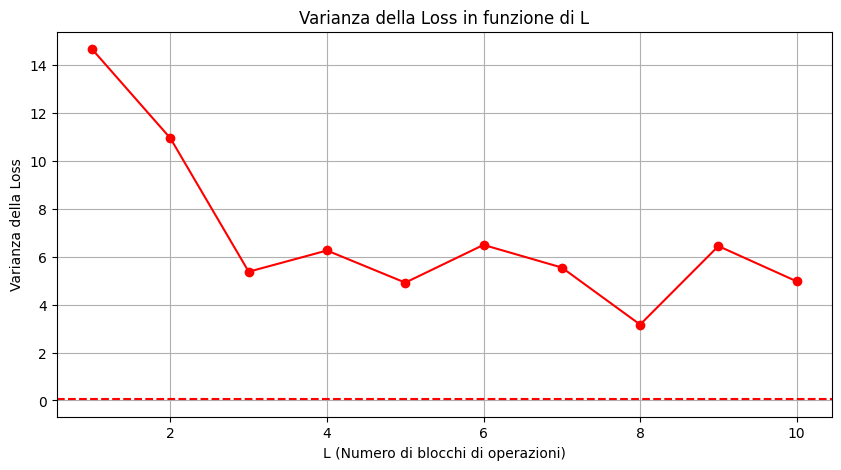

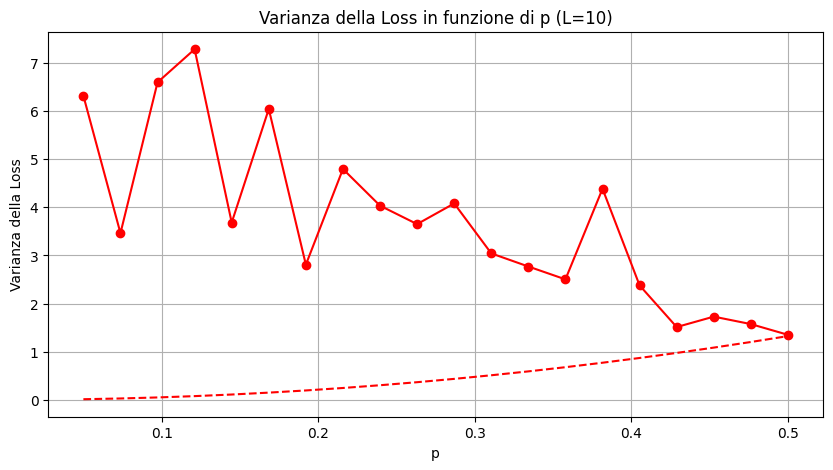

In [ ]:
# Parametri
n=4
shots = 25  # Numero di esecuzioni
L_values_range = 10  # Numero massimo di blocchi di operazioni
p = 0.1  # Probabilità di applicare lo stato GHZ
h = 1  # Coefficiente nell'Hamiltoniano

# Funzione per generare parametri casuali
def generate_random_parameters(n):
    return 2 * np.pi * np.random.rand(2 * n)

# Funzione per mescolare rho con lo stato GHZ
def rho_noise(p, rho):
    rho_ghz = np.zeros_like(rho)
    rho_ghz[0, 0] = 0.5
    rho_ghz[-1, -1] = 0.5
    rho_ghz[0, -1] = 0.5
    rho_ghz[-1, 0] = 0.5
    return (1-p)* rho + (p) * rho_ghz

# Funzione per costruire il circuito e applicare il rumore
def circuit_with_noise(n, p, L):

    circuit = QuantumCircuit(n)
    rho = DensityMatrix.from_instruction(circuit).data  # Matrice densità iniziale

    for _ in range(L):
        # Applica rotazioni casuali
        parameters = generate_random_parameters(n)

        circuit.cx(0,1)

        for i in range(n):
           circuit.rx(parameters[2 * i], i)
           circuit.rz(parameters[2 * i + 1], i)
        circuit.cx(0,1)
        circuit.cx(3,2)
        circuit.swap(0,2)
        circuit.swap(3,1)

        # Evoluzione dello stato
        rho = DensityMatrix.from_instruction(circuit)
        rho = rho_noise(p, rho)
    return rho

# Creazione dell'Hamiltoniano W
pauli_strings = []
coefficients = []

for k in range(n-1):
     # Coefficiente del termine
    coefficients.append(h *(2**(n/2)))
    # Stringa di Pauli per Z_k ⊗ Z_{k+1}
    pauli_string = ['I'] * n
    pauli_string[k] = 'Z'  # Z_k
    pauli_string[(k + 1)] = 'Z'  # Z_{k+1} (periodico)
    pauli_strings.append("".join(pauli_string))

# Creazione dell'Hamiltoniano come SparsePauliOp
W = SparsePauliOp(pauli_strings, coeffs=np.array(coefficients))

# Lista per memorizzare i valori di L
L_values_all = {L: [] for L in range(1, L_values_range + 1)}
L_values_all1 = {L: [] for L in range(1, L_values_range + 1)}

for L in range(1, L_values_range + 1):
    L_values_shots = []

    for _ in range(shots):
        rho = circuit_with_noise(n, p, L)  # Stato con rumore
        W_matrix = W.to_matrix()
        L_value = np.trace(W_matrix @ rho.data)  # Loss
        L_values_shots.append(L_value)

        rho1 = circuit_with_noise_slow(n, p, L)  # Stato con rumore
        W_matrix = W.to_matrix()

    L_values_all[L] = L_values_shots

L_means = {L: np.mean(L_values_all[L]) for L in range(1, L_values_range + 1)}
L_variances = {L: np.var(L_values_all[L]) for L in range(1, L_values_range + 1)}

# Plot della varianza in funzione di L
L_range = list(L_variances.keys())
var_values = list(L_variances.values())
L_values = list(L_means.values())

plt.figure(figsize=(10, 5))
plt.plot(L_range, var_values, marker='o', linestyle='-', color='r')
plt.xlabel('L (Numero di blocchi di operazioni)')
plt.ylabel('Varianza della Loss')
plt.title('Varianza della Loss in funzione di L')
plt.axhline(y=5.33*(p**2), color='r', linestyle='--', label="V_inf")
plt.grid(True)
plt.show()


p_values = np.linspace(0.05, 0.5, 20)

for p in p_values:
    L_values_shots = []
    for _ in range(shots):
        rho = circuit_with_noise(n, p, L_values_range)
        rho1=circuit_with_noise_slow(n,p, L_values_range)  # Stato con rumore
        W_matrix = W.to_matrix()
        L_value = np.trace(W_matrix @ rho.data) # Loss
        L_values_shots.append(L_value)
        L_values_shots1.append(L_value1)
    L_values_all[p] = L_values_shots

L_means = {p: np.mean(L_values_all[p]) for p in p_values}
L_variances = {p: np.var(L_values_all[p]) for p in p_values}
var_values = list(L_variances.values())
L_values = list(L_means.values())
y = 5.3*(p_values)**2

# Plot della varianza in funzione di p
plt.figure(figsize=(10, 5))
plt.plot(p_values, var_values, marker='o', linestyle='-', color='r')
plt.plot(p_values, y, marker='', linestyle='--', color='r')
plt.xlabel('p')
plt.ylabel('Varianza della Loss')
plt.title(f'Varianza della Loss in funzione di p (L={L_values_range})')
plt.grid(True)
plt.show()

Nel secondo, entrambe le varianza hanno andamento crescente, fenomeno tipico del rumore non unitale. Le due curve sono limitate tra la curva attesa per il fast entangling (blu) e per lo slow entangling (viola).

Questi andamenti sembrano essere corretti per il fast entanglement, ma scorretti per lo slow entanglement.

$\textbf{Locality transfer Matrix (LTM)}$

A questo punto siamo interessati a capire quando un operatore lineare che agisce su $ B $ preserva la località dello spazio, cioè quanto due sottospazi di $ B $ sono messi in comunicazione da un operatore lineare. Questo è rappresentato dalla matrice di trasferimento di località $ T $, i cui elementi sono definiti come:
$$
T_{\kappa,\lambda} = \frac{1}{d_\kappa} \sum_{j=1}^{d_\kappa} (\ell_{\Lambda(B_j)})_\lambda,
$$
dove $ \ell_{\Lambda(B_j)} $ è il vettore di località associato all'immagine di $ B_j $ sotto $ \Lambda $.

La matrice $ T $ può essere organizzata in blocchi per evidenziare meglio le interazioni tra gruppi di sottospazi. Ad esempio, se i sottospazi $ B_\kappa $ sono raggruppati in modo gerarchico, la matrice $ T $ può essere scritta come:
$$
T =
\begin{bmatrix}
T^{(1,1)} & 0 & \cdots & T^{(1,n)} \\
0 & T^{(2,2)} & \cdots & T^{(2,n)} \\
\vdots    & \vdots    & \ddots & \vdots    \\
0 & 0 & \cdots & T^{(n,n)}
\end{bmatrix},
$$
dove i blocchi diagonali $ T^{(i,i)} $ rappresentano la preservazione della località all'interno di ciascun gruppo di sottospazi, mentre l'ultima colonna rappresenta la nascita del fenomeno di assorbimento.

L'idea più immediata della matrice T è quella di una matrice che cattura quanto ciascuna località viene spostata in un altra. Per certi versi, possiamo attribuire alle colonne della matrice un significato probabilistico.

Da un punto di vista pratico, per tutti i gate unitari quantistici, la matrice LTM è definita positiva e scomponibile in blocchi con una parte irriducibile. Ovviamente il sottospazio totalmente locale, forma sempre un blocco isolato, l'unico della sua riga e colonna.

Ogni blocco diagonale della LTM è un sottospazio di Hilbert dove vivono i qbit, nel quale l'operatore lineare conserva gli elementi. GLi elementi della colonna irriducibile A sono le parti del sottospazio di Hilber che sono trasferite ad altri blocchi. Questo fenomeno prende il nome di assorbimento. In figura, è rappresentata la generica LTM.

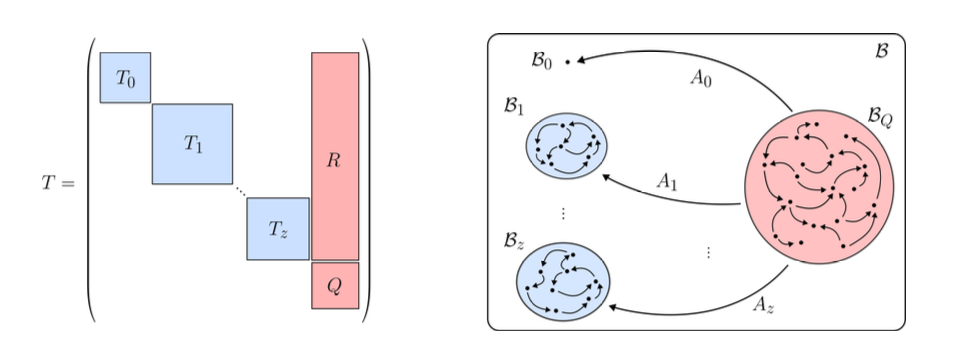

In [ ]:
image3 = "Img/Screenshot 2025-01-22 alle 11.21.30.png"
display(Image(filename=image3, width=1000, height=600))


Le formule utili per calcolare le varianze, rigurdano sempre le LTM dei gate unitari del circuito quantistico.

Inoltre possiamo fare una distinzione: come già detto tutti i gate unitari che non comportano entangle tra qbit hanno una LTM uguale all'identità, più un'applicazione trasferisce sottospazi, più è lontana dall'identità. Inoltre, si può osservare che la varianza è inversamente proporzionale alla dimensione dei blocchi che comunicano. Ovverò una LTM composta da più blocchi piccoli, tenderà generalmente a dare varianze maggiori.

Vediamo il programma che crea la LTM:

$\textbf{Calcolo Matrice LTM}$

                              
q_0: ──■─────────■────────────
     ┌─┴─┐     ┌─┴─┐          
q_1: ┤ X ├──■──┤ X ├──■───────
     └───┘┌─┴─┐└───┘┌─┴─┐     
q_2: ─────┤ X ├──■──┤ X ├──■──
          └───┘┌─┴─┐└───┘┌─┴─┐
q_3: ──────────┤ X ├─────┤ X ├
               └───┘     └───┘


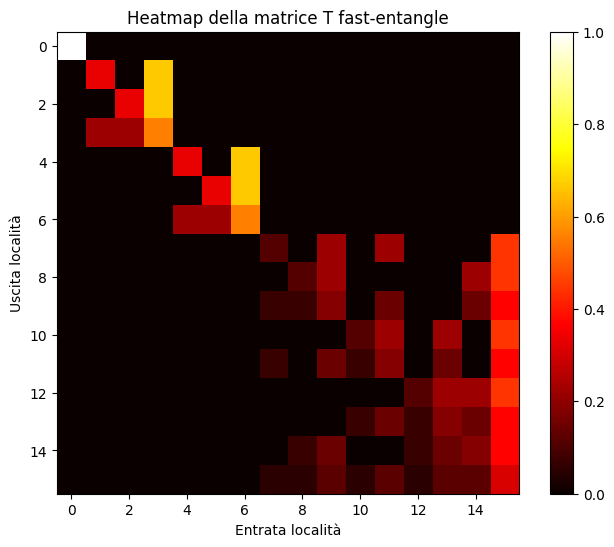

Mappatura della permutazione (nuovo indice -> indice originale):
{0: 0, 1: 1, 2: 4, 3: 5, 4: 2, 5: 8, 6: 10, 7: 3, 8: 6, 9: 7, 10: 9, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15}


In [9]:
from inspect import trace
import numpy as np
import itertools
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.sparse.csgraph import connected_components
import qiskit as qc
from qiskit_aer import Aer
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import DensityMatrix, SparsePauliOp, Operator

n = 4  # Numero di qubit

def pauli_matrices_divided():
    sqrt2 = np.sqrt(2)
    return {
        'I': np.array([[1, 0], [0, 1]], dtype=complex) / sqrt2,
        'X': np.array([[0, 1], [1, 0]], dtype=complex) / sqrt2,
        'Y': np.array([[0, -1j], [1j, 0]], dtype=complex) / sqrt2,
        'Z': np.array([[1, 0], [0, -1]], dtype=complex) / sqrt2
    }

# Creazione delle matrici di Pauli divise
pauli_matrices = pauli_matrices_divided()

# Definizione delle etichette delle matrici di Pauli
matrix_labels = list(pauli_matrices.keys())  # ['I', 'X', 'Y', 'Z']

# 2. Genera tutti i possibili prodotti tensore e definisce la "binary tuple"
tensor_products = []
for combination in itertools.product(matrix_labels, repeat=n):
    tensor = pauli_matrices[combination[0]]
    for label in combination[1:]:
        tensor = np.kron(tensor, pauli_matrices[label])
    binary_tuple = tuple(1 if label != 'I' else 0 for label in combination)
    tensor_products.append((binary_tuple, tensor))

# Ordinamento in base al valore della tuple (facoltativo)
tensor_products.sort(key=lambda item: sum(bit * (2**i) for i, bit in enumerate(item[0])))

# Raggruppa i tensori in base alla binary tuple
groups = defaultdict(list)
for binary_tuple, tensor in tensor_products:
    groups[binary_tuple].append(tensor)

# Lista ordinata delle tuple uniche e definizione del numero J di gruppi
unique_tuples = sorted(groups.keys(), key=lambda tup: sum(bit * (2**i) for i, bit in enumerate(tup)))
J = len(unique_tuples)



############_-------------------------------------------------
# 3. Definizione della matrice H (in questo caso 4 gate pauli X)

n = 4  # Numero di qubit
circuit = QuantumCircuit(n)


circuit.cx(0,1)
for i in range (n-2):
    circuit.cx(i+1, i+2)
    circuit.cx(i, i+1)
circuit.cx(n-2,n-1)
print(circuit)
H = np.array(Operator(circuit))

#-----------------------------------

# 4 Costruzione della matrice T e di l:
T = np.zeros((J, J), dtype=complex)




for j_idx, tup_j in enumerate(unique_tuples):
    LT_vec = np.zeros(J, dtype=complex)
    # Calcola il fattore di normalizzazione per il gruppo B: per ogni '1' nella tuple si ha un fattore 3
    norm_factor_B = 3 ** (sum(tup_j))

    # Per ogni tensore B nel gruppo j
    for B in groups[tup_j]:
        # Ciclo sui gruppi per P (indice k)
        for k_idx, tup_k in enumerate(unique_tuples):
            trace_sum = 0
            # Fattore di normalizzazione per il gruppo P
            norm_factor_P = 3 ** (sum(tup_k))
            for P in groups[tup_k]:
                trace_val = np.trace(H.conj().T @ B @ H @ P)
                # Normalizzazione: il contributo viene diviso per il prodotto dei fattori per B e per P
                trace_sum += (trace_val**2) / (norm_factor_B )
            LT_vec[k_idx] += trace_sum
    T[j_idx, :] = LT_vec



# 5. Diagonalizzazione a blocchi fortemente connessi tramite permutazioni
# Costruiamo una "matrice di connettività": consideriamo un arco tra i nodi i e j se |T[i,j]| > tol
tol = 1e-16
connectivity = (np.abs(T) > tol).astype(int)

# Trova i componenti connessi (trattando la matrice come grafo non diretto)
n_components, comp_labels = connected_components(connectivity, directed=False, connection='weak')

# La permutazione che raggruppa per componente è data da:
permutation = np.argsort(comp_labels)
# Riordiniamo T per ottenere una forma bloc-diagonale
T_perm = T[permutation, :][:, permutation]

# Salviamo la mappatura della permutazione: (nuovo indice -> indice originale)
perm_mapping = {new_idx: old_idx for new_idx, old_idx in enumerate(permutation)}

# 6. Plot della matrice T permutata come heatmap (si plottano i valori reali)
plt.figure(figsize=(8, 6))
plt.imshow(np.real(T_perm), cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xlabel("Entrata località")
plt.ylabel("Uscita località")
plt.title("Heatmap della matrice T fast-entangle")
plt.show()

# Salva (o stampa) la mappatura della permutazione
print("Mappatura della permutazione (nuovo indice -> indice originale):")
print(perm_mapping)

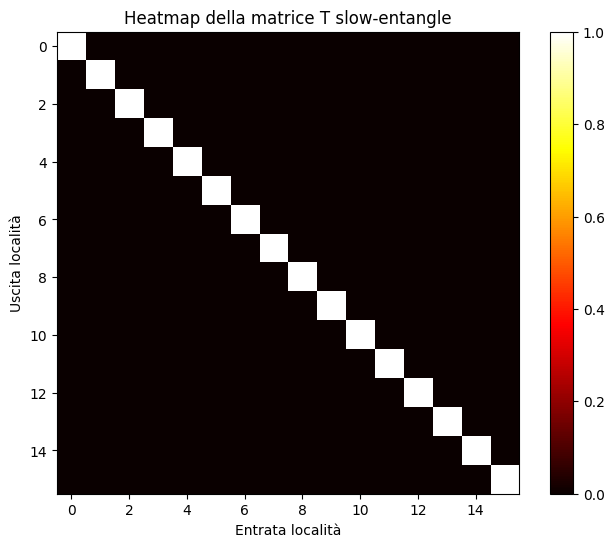

Mappatura della permutazione (nuovo indice -> indice originale):
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15}


In [ ]:
from inspect import trace
import numpy as np
import itertools
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.sparse.csgraph import connected_components
import qiskit as qc
from qiskit_aer import Aer
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import DensityMatrix, SparsePauliOp

n = 4  # Numero di qubit

def pauli_matrices_divided():
    sqrt2 = np.sqrt(2)
    return {
        'I': np.array([[1, 0], [0, 1]], dtype=complex) / sqrt2,
        'X': np.array([[0, 1], [1, 0]], dtype=complex) / sqrt2,
        'Y': np.array([[0, -1j], [1j, 0]], dtype=complex) / sqrt2,
        'Z': np.array([[1, 0], [0, -1]], dtype=complex) / sqrt2
    }

# Creazione delle matrici di Pauli divise
pauli_matrices = pauli_matrices_divided()

# Definizione delle etichette delle matrici di Pauli
matrix_labels = list(pauli_matrices.keys())  # ['I', 'X', 'Y', 'Z']

# 2. Genera tutti i possibili prodotti tensore e definisce la "binary tuple"
tensor_products = []
for combination in itertools.product(matrix_labels, repeat=n):
    tensor = pauli_matrices[combination[0]]
    for label in combination[1:]:
        tensor = np.kron(tensor, pauli_matrices[label])
    binary_tuple = tuple(1 if label != 'I' else 0 for label in combination)
    tensor_products.append((binary_tuple, tensor))

# Ordinamento in base al valore della tuple (facoltativo)
tensor_products.sort(key=lambda item: sum(bit * (2**i) for i, bit in enumerate(item[0])))

# Raggruppa i tensori in base alla binary tuple
groups = defaultdict(list)
for binary_tuple, tensor in tensor_products:
    groups[binary_tuple].append(tensor)

# Lista ordinata delle tuple uniche e definizione del numero J di gruppi
unique_tuples = sorted(groups.keys(), key=lambda tup: sum(bit * (2**i) for i, bit in enumerate(tup)))
J = len(unique_tuples)



############_-------------------------------------------------
# 3. Definizione della matrice H (in questo caso 4 gate pauli X)

def pauli_x():
    return np.array([[0, 1], [1, 0]], dtype=complex)

# Prodotto tensoriale di 4 porte X
x_gate = pauli_x()
H = x_gate
for _ in range(3):  # Aggiunge 3 porte X per un totale di 4
    H = np.kron(H, x_gate)

#-----------------------------------

# 4 Costruzione della matrice T e di l:
# Per ciascun gruppo j (per tensori B) e per ciascun gruppo k (per tensori P)
# si somma (con normalizzazione) il contributo: (trace(H† B H P))^2.



T = np.zeros((J, J), dtype=complex)




for j_idx, tup_j in enumerate(unique_tuples):
    LT_vec = np.zeros(J, dtype=complex)
    # Calcola il fattore di normalizzazione per il gruppo B: per ogni '1' nella tuple si ha un fattore 3
    norm_factor_B = 3 ** (sum(tup_j))

    # Per ogni tensore B nel gruppo j
    for B in groups[tup_j]:
        # Ciclo sui gruppi per P (indice k)
        for k_idx, tup_k in enumerate(unique_tuples):
            trace_sum = 0
            # Fattore di normalizzazione per il gruppo P
            norm_factor_P = 3 ** (sum(tup_k))
            for P in groups[tup_k]:
                trace_val = np.trace(H.conj().T @ B @ H @ P)
                # Normalizzazione: il contributo viene diviso per il prodotto dei fattori per B e per P
                trace_sum += (trace_val**2) / (norm_factor_B )
            LT_vec[k_idx] += trace_sum
    T[j_idx, :] = LT_vec



# 5. Diagonalizzazione a blocchi fortemente connessi tramite permutazioni
# Costruiamo una "matrice di connettività": consideriamo un arco tra i nodi i e j se |T[i,j]| > tol
tol = 1e-16
connectivity = (np.abs(T) > tol).astype(int)

# Trova i componenti connessi (trattando la matrice come grafo non diretto)
n_components, comp_labels = connected_components(connectivity, directed=False, connection='weak')

# La permutazione che raggruppa per componente è data da:
permutation = np.argsort(comp_labels)
# Riordiniamo T per ottenere una forma bloc-diagonale
T_perm = T[permutation, :][:, permutation]

# Salviamo la mappatura della permutazione: (nuovo indice -> indice originale)
perm_mapping = {new_idx: old_idx for new_idx, old_idx in enumerate(permutation)}

# 6. Plot della matrice T permutata come heatmap (si plottano i valori reali)
plt.figure(figsize=(8, 6))
plt.imshow(np.real(T_perm), cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xlabel("Entrata località")
plt.ylabel("Uscita località")
plt.title("Heatmap della matrice T slow-entangle")
plt.show()

# Salva (o stampa) la mappatura della permutazione
print("Mappatura della permutazione (nuovo indice -> indice originale):")
print(perm_mapping)


#Calcolo prodotto scalare
Il codice per calcolare esplicitamente la varianza invece tra due vettori località:

<ipython-input-22-83274f394454>:47: ComplexWarning: Casting complex values to real discards the imaginary part
  LC_vec[k_idx] += trace_sum


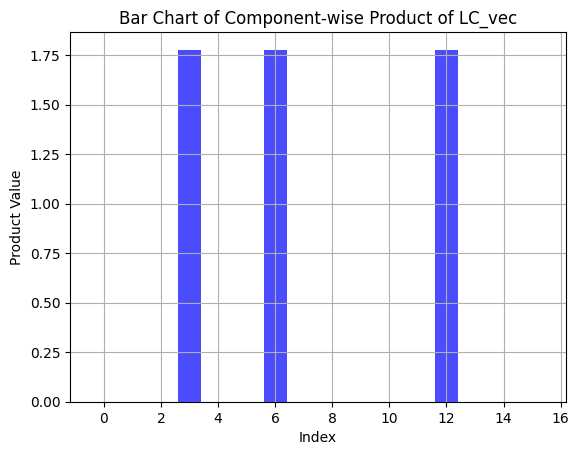

Somma normalizzata (A) = 5.333333333333326
Varianza infinito= 0.05333333333333326
Varianza infinito in funzione di p (slow entangling)= p/(2-p) 5.333333333333326
Varianza infinito in funzione di p (rapid entangling)= p^2* 5.333333333333326


In [ ]:
LC_vec = np.zeros(len(unique_tuples))
n=4
import numpy as np
from qiskit.quantum_info import DensityMatrix, SparsePauliOp
def ghz_density_matrix(n):
    dim = 2 ** n  # Dimensione della matrice 2^n x 2^n
    rho_ghz = np.zeros((dim, dim), dtype=np.complex128)
    rho_ghz[0, 0] = 0.5
    rho_ghz[-1, -1] = 0.5
    rho_ghz[0, -1] = 0.5
    rho_ghz[-1, 0] = 0.5
    return rho_ghz

#Definizione della matrice H (in questo caso l'identità 4x4)
h=1
pauli_strings = []
coefficients = []

for k in range(n-1):
     # Coefficiente del termine
    coefficients.append(h *(2**(n/2)))
    # Stringa di Pauli per Z_k ⊗ Z_{k+1}
    pauli_string = ['I'] * n
    pauli_string[k] = 'Z'  # Z_k
    pauli_string[(k + 1)] = 'Z'  # Z_{k+1} (periodico)
    pauli_strings.append("".join(pauli_string))

# Creazione dell'Hamiltoniano come SparsePauliOp
W = SparsePauliOp(pauli_strings, coeffs=np.array(coefficients))
W_matrix = W.to_matrix()


#METTI H E RHO I VETTORI DA CALCOLARE LA LOC
H=W_matrix
rho=ghz_density_matrix(n)
#------____----_-___-__-___--___---__--__-_------------


def compute_LC_vec(AV):
    LC_vec = np.zeros(len(unique_tuples))
    for k_idx, tup_k in enumerate(unique_tuples):
        trace_sum = 0
        norm_factor_P = 3 ** (sum(tup_k))
        for P in groups[tup_k]:
            trace_val = np.trace(AV @ P)
            trace_sum += (trace_val**2) / np.sqrt(norm_factor_P)
        LC_vec[k_idx] += trace_sum
    return LC_vec


L1= compute_LC_vec(rho)
L2 = compute_LC_vec(H)

def plot_LC_product(l1, l2):
    # Calcola il prodotto dei vettori
    a = l1 * l2
    np.save('LC_product.npy', a)

    # Inizializza una lista per i contributi normalizzati
    normalized_contributions = []

    # Ciclo attraverso le componenti del vettore e gli indici delle tuple
    for i, tup_j in enumerate(unique_tuples):
        normalized_value = a[i]
        normalized_contributions.append(normalized_value)

    # Crea un istogramma con barre numerate
    indices = np.arange(len(a))
    plt.bar(indices, a, alpha=0.7, color='blue')

    # Aggiungi le etichette sopra le barre
    for i, value in enumerate(a):
      plt.xlabel('Index')
      plt.ylabel('Product Value')
      plt.title('Bar Chart of Component-wise Product of LC_vec')
      plt.grid(True)
      plt.show()

      # Calcola la somma totale dei contributi normalizzati
      total_normalized_sum = np.sum(normalized_contributions)

      return a, total_normalized_sum

def plot_histograms(L1, L2):
    indices = np.arange(len(L1))
    width = 0.4
    plt.figure(figsize=(10, 5))
    plt.bar(indices - width/2, L1, width=width, label='Componenti l H OSSERVABILE', alpha=0.7, color='blue')
    plt.bar(indices + width/2, L2, width=width, label='Componenti l Rho STATO DEPOLARIZZATO', alpha=0.7, color='orange')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Confronto componenti vettore località')
    plt.legend()
    plt.grid(True)
    plt.show()

_, A = plot_LC_product(L1, L2)

# Stampa il valore di A
print("Somma normalizzata (A) =", A)

# Calcola V usando A
V = 0.01 * A



print("Varianza infinito=", V)
print("Varianza infinito in funzione di p (slow entangling)= p/(2-p)", A)
print("Varianza infinito in funzione di p (rapid entangling)= p^2*", A)
